In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file input already exists.
Error occurred while processing: input.


A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file outputs already exists.
Error occurred while processing: outputs.


# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    # Real labels - Soft labels with 0.9 instead of 1
    data = torch.ones(size, 1) * 0.9
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    # Real labels - Soft labels with 0.9 instead of 1
    data = torch.ones(size, 1) * 0.1
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

  0%|          | 0/117 [00:00<?, ?it/s]

118it [00:06, 18.58it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 16.67it/s]

Epoch 1 of 100
Generator loss: 1.46651404, Discriminator loss: 1.00119377


118it [00:06, 19.57it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 18.02it/s]

Epoch 2 of 100
Generator loss: 1.53412308, Discriminator loss: 1.10911133


118it [00:05, 19.83it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 17.94it/s]

Epoch 3 of 100
Generator loss: 2.00853556, Discriminator loss: 1.02279204


118it [00:06, 19.61it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 18.02it/s]

Epoch 4 of 100
Generator loss: 1.67656200, Discriminator loss: 1.10363792


118it [00:05, 19.88it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


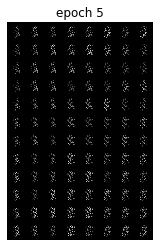

  2%|▏         | 2/117 [00:00<00:07, 15.50it/s]

Epoch 5 of 100
Generator loss: 1.42423522, Discriminator loss: 1.18301932


118it [00:05, 19.68it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 19.14it/s]

Epoch 6 of 100
Generator loss: 2.78415351, Discriminator loss: 0.98852970


118it [00:05, 20.27it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 16.46it/s]

Epoch 7 of 100
Generator loss: 2.13169993, Discriminator loss: 0.83999027


118it [00:06, 18.97it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 18.02it/s]

Epoch 8 of 100
Generator loss: 1.51309879, Discriminator loss: 1.01357974


118it [00:06, 19.63it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 17.09it/s]

Epoch 9 of 100
Generator loss: 1.55835087, Discriminator loss: 1.00000611


118it [00:06, 19.66it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


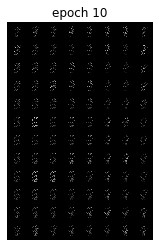

  2%|▏         | 2/117 [00:00<00:07, 14.60it/s]

Epoch 10 of 100
Generator loss: 1.54235229, Discriminator loss: 1.10006045


118it [00:06, 19.48it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 17.39it/s]

Epoch 11 of 100
Generator loss: 1.40770124, Discriminator loss: 1.03175668


118it [00:06, 19.28it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 18.18it/s]

Epoch 12 of 100
Generator loss: 1.79394831, Discriminator loss: 1.05260004


118it [00:05, 20.09it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 16.95it/s]

Epoch 13 of 100
Generator loss: 2.17003515, Discriminator loss: 0.99603440


118it [00:06, 19.51it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 17.09it/s]

Epoch 14 of 100
Generator loss: 1.25597967, Discriminator loss: 1.05757180


118it [00:06, 19.18it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


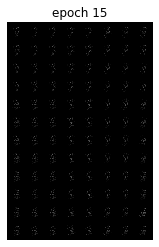

  2%|▏         | 2/117 [00:00<00:08, 13.33it/s]

Epoch 15 of 100
Generator loss: 1.54776037, Discriminator loss: 1.11615801


118it [00:06, 19.40it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 17.70it/s]

Epoch 16 of 100
Generator loss: 1.54035685, Discriminator loss: 1.07933181


118it [00:05, 19.94it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 16.80it/s]

Epoch 17 of 100
Generator loss: 1.22549942, Discriminator loss: 1.14739264


118it [00:06, 19.38it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 17.09it/s]

Epoch 18 of 100
Generator loss: 1.60772147, Discriminator loss: 1.05576659


118it [00:06, 19.51it/s]                         
  2%|▏         | 2/117 [00:00<00:07, 15.68it/s]

Epoch 19 of 100
Generator loss: 1.09525081, Discriminator loss: 1.24532261


118it [00:06, 19.54it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


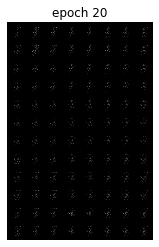

  2%|▏         | 2/117 [00:00<00:07, 14.81it/s]

Epoch 20 of 100
Generator loss: 1.38920405, Discriminator loss: 1.09298170


118it [00:06, 19.47it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 16.67it/s]

Epoch 21 of 100
Generator loss: 1.44846562, Discriminator loss: 0.96355027


118it [00:06, 19.38it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 16.81it/s]

Epoch 22 of 100
Generator loss: 1.36013940, Discriminator loss: 1.03528347


118it [00:06, 19.54it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 18.18it/s]

Epoch 23 of 100
Generator loss: 1.58280130, Discriminator loss: 0.96306623


118it [00:05, 19.75it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 16.46it/s]

Epoch 24 of 100
Generator loss: 1.48087483, Discriminator loss: 1.02098287


118it [00:06, 19.23it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


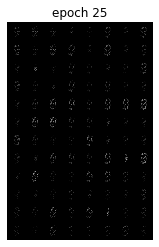

  2%|▏         | 2/117 [00:00<00:07, 14.59it/s]

Epoch 25 of 100
Generator loss: 1.56354626, Discriminator loss: 0.93948487


118it [00:05, 19.75it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 16.67it/s]

Epoch 26 of 100
Generator loss: 1.66258596, Discriminator loss: 0.93331216


118it [00:06, 18.98it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 17.77it/s]

Epoch 27 of 100
Generator loss: 1.73157551, Discriminator loss: 0.87381274


118it [00:06, 19.46it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 17.41it/s]

Epoch 28 of 100
Generator loss: 1.85813876, Discriminator loss: 0.85654991


118it [00:05, 19.90it/s]                         
  2%|▏         | 2/117 [00:00<00:05, 19.23it/s]

Epoch 29 of 100
Generator loss: 1.78485425, Discriminator loss: 0.93063114


118it [00:05, 19.97it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


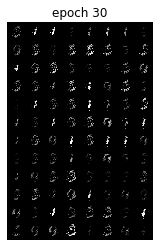

  2%|▏         | 2/117 [00:00<00:07, 14.60it/s]

Epoch 30 of 100
Generator loss: 1.74325547, Discriminator loss: 0.87174895


118it [00:06, 19.66it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 18.60it/s]

Epoch 31 of 100
Generator loss: 1.73006608, Discriminator loss: 0.90881305


118it [00:06, 19.08it/s]                         
  2%|▏         | 2/117 [00:00<00:05, 19.23it/s]

Epoch 32 of 100
Generator loss: 1.62699247, Discriminator loss: 0.91048985


118it [00:06, 19.62it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 18.52it/s]

Epoch 33 of 100
Generator loss: 1.71198858, Discriminator loss: 0.94411642


118it [00:06, 19.52it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 18.18it/s]

Epoch 34 of 100
Generator loss: 1.71324362, Discriminator loss: 0.90464199


118it [00:06, 19.58it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


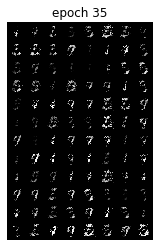

  2%|▏         | 2/117 [00:00<00:07, 14.44it/s]

Epoch 35 of 100
Generator loss: 1.58906227, Discriminator loss: 0.95546860


118it [00:05, 20.27it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 17.39it/s]

Epoch 36 of 100
Generator loss: 1.78500989, Discriminator loss: 0.90921105


118it [00:06, 19.50it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 17.09it/s]

Epoch 37 of 100
Generator loss: 1.73748712, Discriminator loss: 0.90289104


118it [00:06, 19.36it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 17.54it/s]

Epoch 38 of 100
Generator loss: 1.89415681, Discriminator loss: 0.87749493


118it [00:05, 19.82it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 17.47it/s]

Epoch 39 of 100
Generator loss: 1.67662344, Discriminator loss: 0.92997232


118it [00:06, 19.06it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


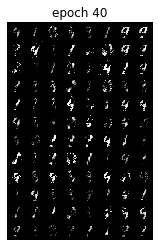

  2%|▏         | 2/117 [00:00<00:08, 13.79it/s]

Epoch 40 of 100
Generator loss: 1.74031670, Discriminator loss: 0.89500196


118it [00:05, 19.80it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 17.09it/s]

Epoch 41 of 100
Generator loss: 1.76274697, Discriminator loss: 0.90059516


118it [00:05, 19.67it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 16.53it/s]

Epoch 42 of 100
Generator loss: 1.75201332, Discriminator loss: 0.87870161


118it [00:06, 19.29it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 17.17it/s]

Epoch 43 of 100
Generator loss: 1.66821895, Discriminator loss: 0.91695608


118it [00:06, 19.30it/s]                         
  2%|▏         | 2/117 [00:00<00:07, 15.87it/s]

Epoch 44 of 100
Generator loss: 1.77440563, Discriminator loss: 0.87368093


118it [00:05, 19.77it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


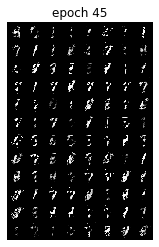

  2%|▏         | 2/117 [00:00<00:07, 15.09it/s]

Epoch 45 of 100
Generator loss: 1.79058296, Discriminator loss: 0.86373438


118it [00:06, 19.60it/s]                         
  2%|▏         | 2/117 [00:00<00:07, 16.26it/s]

Epoch 46 of 100
Generator loss: 1.78850765, Discriminator loss: 0.86768683


118it [00:06, 19.20it/s]                         
  2%|▏         | 2/117 [00:00<00:05, 19.78it/s]

Epoch 47 of 100
Generator loss: 1.70376004, Discriminator loss: 0.91435203


118it [00:05, 20.07it/s]                         
  2%|▏         | 2/117 [00:00<00:05, 19.22it/s]

Epoch 48 of 100
Generator loss: 1.82355299, Discriminator loss: 0.90642586


118it [00:06, 19.55it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 17.46it/s]

Epoch 49 of 100
Generator loss: 1.75466609, Discriminator loss: 0.88273969


118it [00:06, 19.26it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


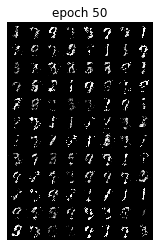

  2%|▏         | 2/117 [00:00<00:08, 13.84it/s]

Epoch 50 of 100
Generator loss: 1.71315730, Discriminator loss: 0.88226813


118it [00:06, 19.31it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 18.69it/s]

Epoch 51 of 100
Generator loss: 1.72520663, Discriminator loss: 0.88195397


118it [00:05, 19.67it/s]                         
  2%|▏         | 2/117 [00:00<00:05, 20.00it/s]

Epoch 52 of 100
Generator loss: 1.69949252, Discriminator loss: 0.91235805


118it [00:05, 19.69it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 18.69it/s]

Epoch 53 of 100
Generator loss: 1.74338559, Discriminator loss: 0.93518155


118it [00:05, 19.81it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 17.86it/s]

Epoch 54 of 100
Generator loss: 1.57207584, Discriminator loss: 0.94158050


118it [00:05, 19.69it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


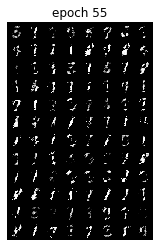

  2%|▏         | 2/117 [00:00<00:07, 14.64it/s]

Epoch 55 of 100
Generator loss: 1.58419716, Discriminator loss: 0.92960210


118it [00:06, 19.35it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 18.69it/s]

Epoch 56 of 100
Generator loss: 1.59115797, Discriminator loss: 0.91242581


118it [00:05, 20.07it/s]                         
  2%|▏         | 2/117 [00:00<00:07, 16.39it/s]

Epoch 57 of 100
Generator loss: 1.60024667, Discriminator loss: 0.93341828


118it [00:06, 19.59it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 17.17it/s]

Epoch 58 of 100
Generator loss: 1.65969698, Discriminator loss: 0.91816418


118it [00:06, 19.51it/s]                         
  2%|▏         | 2/117 [00:00<00:07, 15.56it/s]

Epoch 59 of 100
Generator loss: 1.60507827, Discriminator loss: 0.93318354


118it [00:06, 19.49it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


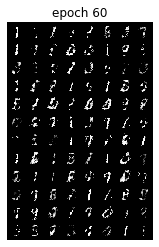

  2%|▏         | 2/117 [00:00<00:08, 13.79it/s]

Epoch 60 of 100
Generator loss: 1.64475438, Discriminator loss: 0.94253830


118it [00:06, 19.50it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 17.54it/s]

Epoch 61 of 100
Generator loss: 1.48934943, Discriminator loss: 1.00835818


118it [00:05, 20.04it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 17.54it/s]

Epoch 62 of 100
Generator loss: 1.50683204, Discriminator loss: 1.02578458


118it [00:06, 19.38it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 16.67it/s]

Epoch 63 of 100
Generator loss: 1.44228654, Discriminator loss: 1.01488994


118it [00:05, 19.89it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 17.54it/s]

Epoch 64 of 100
Generator loss: 1.50527349, Discriminator loss: 0.96931557


118it [00:05, 20.21it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


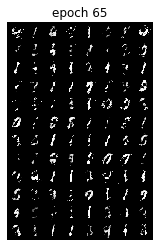

  2%|▏         | 2/117 [00:00<00:07, 14.49it/s]

Epoch 65 of 100
Generator loss: 1.54584358, Discriminator loss: 0.95620890


118it [00:06, 19.31it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 18.51it/s]

Epoch 66 of 100
Generator loss: 1.56755470, Discriminator loss: 0.94524215


118it [00:06, 19.30it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 18.35it/s]

Epoch 67 of 100
Generator loss: 1.54642482, Discriminator loss: 0.95643874


118it [00:06, 19.35it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 16.81it/s]

Epoch 68 of 100
Generator loss: 1.52705560, Discriminator loss: 1.00568687


118it [00:06, 19.56it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 18.52it/s]

Epoch 69 of 100
Generator loss: 1.42696091, Discriminator loss: 1.02853911


118it [00:06, 19.31it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


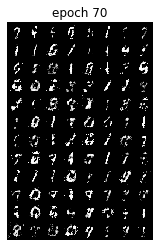

  2%|▏         | 2/117 [00:00<00:07, 14.44it/s]

Epoch 70 of 100
Generator loss: 1.38681029, Discriminator loss: 1.02761524


118it [00:06, 19.57it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 17.39it/s]

Epoch 71 of 100
Generator loss: 1.53072064, Discriminator loss: 0.95802721


118it [00:06, 19.54it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 18.16it/s]

Epoch 72 of 100
Generator loss: 1.48488977, Discriminator loss: 0.96935926


118it [00:06, 19.45it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 18.35it/s]

Epoch 73 of 100
Generator loss: 1.48081729, Discriminator loss: 0.99203489


118it [00:06, 19.35it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 18.59it/s]

Epoch 74 of 100
Generator loss: 1.49693966, Discriminator loss: 0.98877850


118it [00:05, 20.32it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


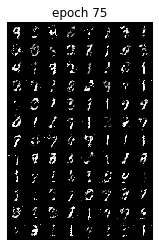

  2%|▏         | 2/117 [00:00<00:08, 13.74it/s]

Epoch 75 of 100
Generator loss: 1.45590038, Discriminator loss: 1.00893642


118it [00:06, 19.29it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 17.11it/s]

Epoch 76 of 100
Generator loss: 1.40223275, Discriminator loss: 1.02405843


118it [00:06, 19.64it/s]                         
  2%|▏         | 2/117 [00:00<00:07, 16.19it/s]

Epoch 77 of 100
Generator loss: 1.46333155, Discriminator loss: 1.00673792


118it [00:05, 19.77it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 17.21it/s]

Epoch 78 of 100
Generator loss: 1.42549878, Discriminator loss: 1.05454740


118it [00:06, 19.49it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 17.12it/s]

Epoch 79 of 100
Generator loss: 1.42847779, Discriminator loss: 1.00201975


118it [00:06, 19.50it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


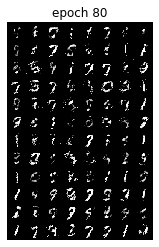

  2%|▏         | 2/117 [00:00<00:08, 13.94it/s]

Epoch 80 of 100
Generator loss: 1.38235017, Discriminator loss: 1.03714576


118it [00:05, 19.76it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 18.50it/s]

Epoch 81 of 100
Generator loss: 1.37606363, Discriminator loss: 1.04367256


118it [00:06, 19.48it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 18.35it/s]

Epoch 82 of 100
Generator loss: 1.32736347, Discriminator loss: 1.04976758


118it [00:06, 19.12it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 18.14it/s]

Epoch 83 of 100
Generator loss: 1.37394506, Discriminator loss: 1.03572511


118it [00:06, 19.42it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 18.69it/s]

Epoch 84 of 100
Generator loss: 1.34053169, Discriminator loss: 1.05274053


118it [00:05, 20.18it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


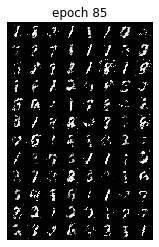

  1%|          | 1/117 [00:00<00:11,  9.71it/s]

Epoch 85 of 100
Generator loss: 1.37344304, Discriminator loss: 1.04350931


118it [00:06, 19.21it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 17.39it/s]

Epoch 86 of 100
Generator loss: 1.35161579, Discriminator loss: 1.05874219


118it [00:06, 19.66it/s]                         
  2%|▏         | 2/117 [00:00<00:07, 16.30it/s]

Epoch 87 of 100
Generator loss: 1.41048963, Discriminator loss: 1.01725570


118it [00:06, 19.34it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 17.14it/s]

Epoch 88 of 100
Generator loss: 1.40552388, Discriminator loss: 1.02700579


118it [00:06, 19.36it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 18.00it/s]

Epoch 89 of 100
Generator loss: 1.36117869, Discriminator loss: 1.06276120


118it [00:06, 19.20it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


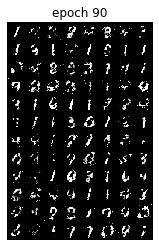

  2%|▏         | 2/117 [00:00<00:08, 13.97it/s]

Epoch 90 of 100
Generator loss: 1.41011451, Discriminator loss: 1.03115722


118it [00:06, 19.37it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 16.63it/s]

Epoch 91 of 100
Generator loss: 1.37594056, Discriminator loss: 1.04916686


118it [00:06, 18.87it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 18.50it/s]

Epoch 92 of 100
Generator loss: 1.42244372, Discriminator loss: 1.04114691


118it [00:06, 19.40it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 17.36it/s]

Epoch 93 of 100
Generator loss: 1.40433963, Discriminator loss: 1.05735680


118it [00:06, 19.47it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 18.11it/s]

Epoch 94 of 100
Generator loss: 1.33874590, Discriminator loss: 1.06177564


118it [00:06, 19.13it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


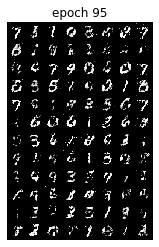

  2%|▏         | 2/117 [00:00<00:07, 14.83it/s]

Epoch 95 of 100
Generator loss: 1.34000043, Discriminator loss: 1.06143620


118it [00:06, 19.58it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 16.87it/s]

Epoch 96 of 100
Generator loss: 1.39438782, Discriminator loss: 1.04235741


118it [00:06, 19.44it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 16.51it/s]

Epoch 97 of 100
Generator loss: 1.38757472, Discriminator loss: 1.03086857


118it [00:06, 19.53it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 17.20it/s]

Epoch 98 of 100
Generator loss: 1.34012020, Discriminator loss: 1.05227581


118it [00:06, 19.31it/s]                         
  2%|▏         | 2/117 [00:00<00:06, 18.69it/s]

Epoch 99 of 100
Generator loss: 1.38653524, Discriminator loss: 1.04786101


118it [00:06, 19.56it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


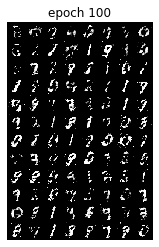

Epoch 100 of 100
Generator loss: 1.33316908, Discriminator loss: 1.07947757


In [14]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    loss = criterion(output, true_label)
    return loss

    ######################################

def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    loss = criterion(output, true_label)
    return loss

    ######################################


for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ##########
        X, _ = data
        X = X.to(device)
        batch_size = len(X)

        # Train Discriminator
        optim_d.zero_grad()
        # Real images
        real_labels = label_real(batch_size)
        output_r = discriminator(X)
        d_real_loss = discriminator_loss(output_r, real_labels)
        d_real_loss.backward()

        # Fake images
        noise = create_noise(batch_size, nz)
        fake_X = generator(noise)
        fake_labels = label_fake(batch_size)
        output_f = discriminator(fake_X)
        d_fake_loss = discriminator_loss(output_f, fake_labels)
        d_fake_loss.backward()

        optim_d.step()
        loss_d += (d_real_loss.item() + d_fake_loss.item())

        # Train Generator
        optim_g.zero_grad()
        noise = create_noise(batch_size, nz)
        fake_X = generator(noise)
        output_g = discriminator(fake_X)
        g_loss = generator_loss(output_g, real_labels)
        g_loss.backward()
        optim_g.step()
        loss_g += g_loss.item()


        ######################################


    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()

    # make the images as grid
    generated_img = make_grid(generated_img)

    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()

    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)

    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [18]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs_q1c/generator.pth')

DONE TRAINING


In [19]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs_q1c/generator_images.gif', imgs)

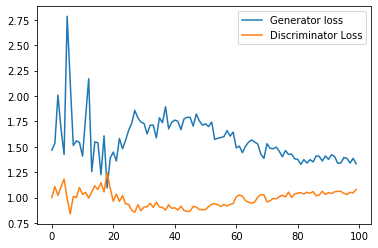

In [20]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs_q1c/q1c_loss.png')